# Homework 1 - Linear Regression

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training_modified.csv" and "LifeExpectancy_test_modified.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test_modified.csv"

Features :
- Year : from 2002 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)
- Health_Index: Health index

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training_modified.csv", contains 1064 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test_modified.csv", contains 458 rows and 14 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

In [ ]:
import numpy as np
import pandas as pd

Load the training data "LifeExpectancy_training_modified.csv" in Colab and View the first 5 lines

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load the training data
import io
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training_modified.csv']))

In [ ]:
# Show the first 5 lines
### WRITE CODE ###
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,0.475880,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,0.203275,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,0.913847,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,0.275401,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,0.400974,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

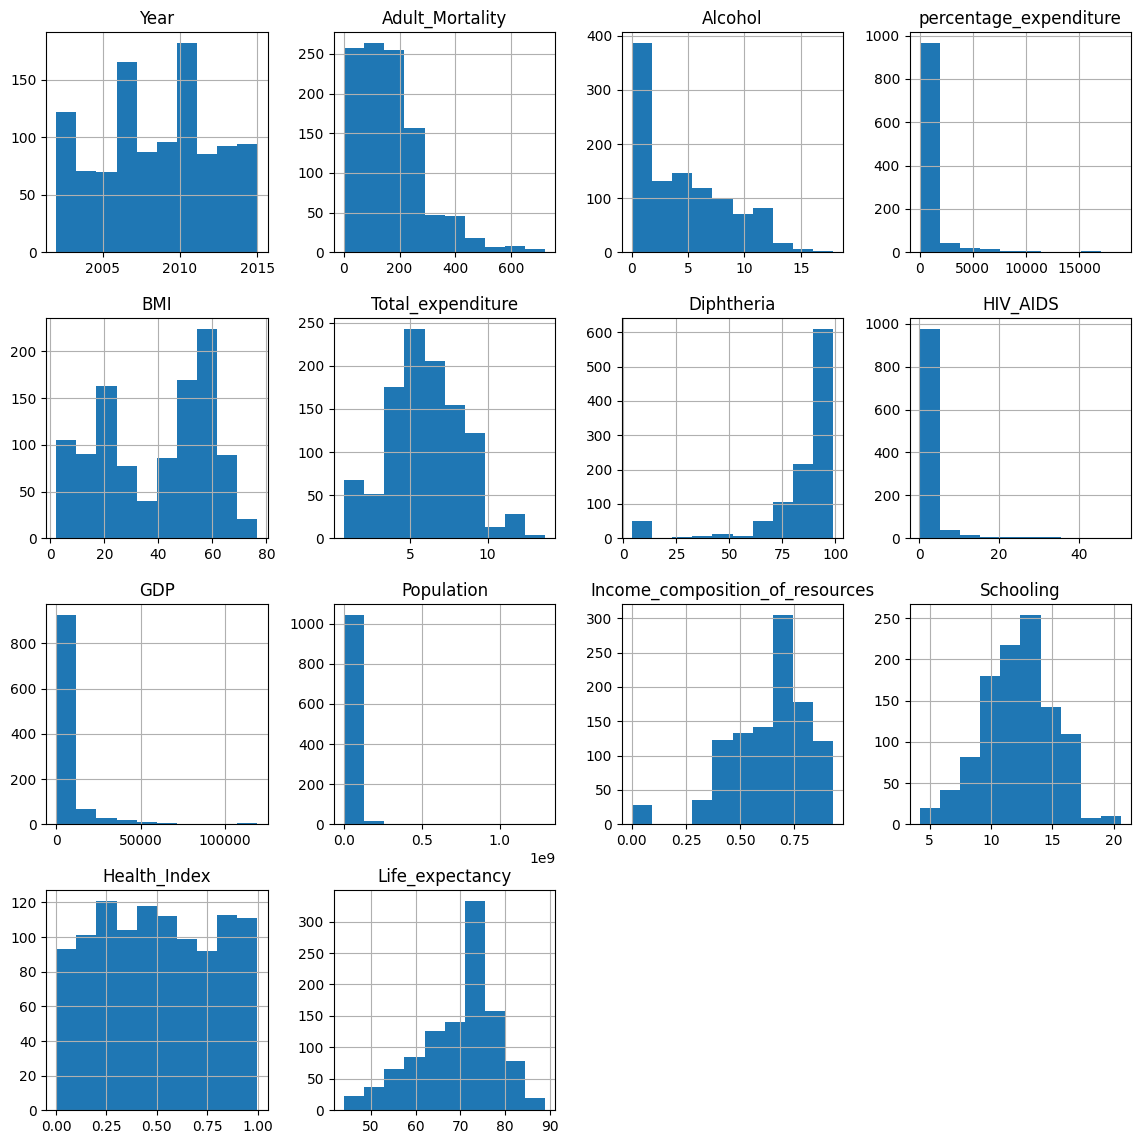

In [ ]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
import matplotlib.pyplot as plt

x = df.drop(columns=['Status'])
x.hist(figsize=(14, 14))
plt.show()

##### Q1. What can you infer from the histograms? <br/>
Ans-

We can infer different aspects of the dataset distribution through each and every histogram, such as shape of distribution, outliers and spread. Let's go through them one by one.

Year: The data is close to uniform distribution across the years 2002 to 2015, suggesting a balanced dataset with respect to time.

Adult_Mortality: This feature has a right-skewed distribution, meaning that most countries have lowe adult mortality rates, with very few countries having very high rates.

Alcohol: Alcohol consumption is also right-skewed, suggesting most of the countries have lower alcohol consumption per capita, with few exceptions.

Percentage_expenditure: This feature has an even stronger right skew, with most countries spending lower percentage of GDP on health, and a few countries spending much more.

BMI: The Body Mass Index distribution has a bimodal shape, the two distinct peaks indicate different dietary habits, culture norms and economic factors that directly impact BMI, which are likely differentiated between developing and developed countries.

Total_Expenditure is mostly bell-shaped and somewhat right-skewed, but less pronounced than other variables, meaning government health expenditure is fairly moderate across most countries.

Diphtheria's immunization coverage among 1-year-olds shows a strong left-skew, with most countries having high standards on coverage for babies.

HIV/AIDs, GPD and population are all extermely right-skewed in similar shape, incidcating that most countries having low rates of HIV/AIDS-related deaths, in addition to a large disparity in economic wealth among them (where most countries have low GPD per capita), and most being countries with less populations.

Income_Composition_of_Resources is roughly bell-shaped but slightly right-skewed, suggesting most countries are towards the higher end of the scale in human development index scores related to income.

The number of years of schooling appears to be normally distributed, with most countries having an average number of years of schooling around the middle of the range.

Health Index distribution is quite uniformed, where the health index is distributed fairly evenly across countries.

Life Expectancy: The target variable is somewhat normally distributed but moderately left-skewed, with most countries having a life expectancy in the upper middle range of the dataset.

Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

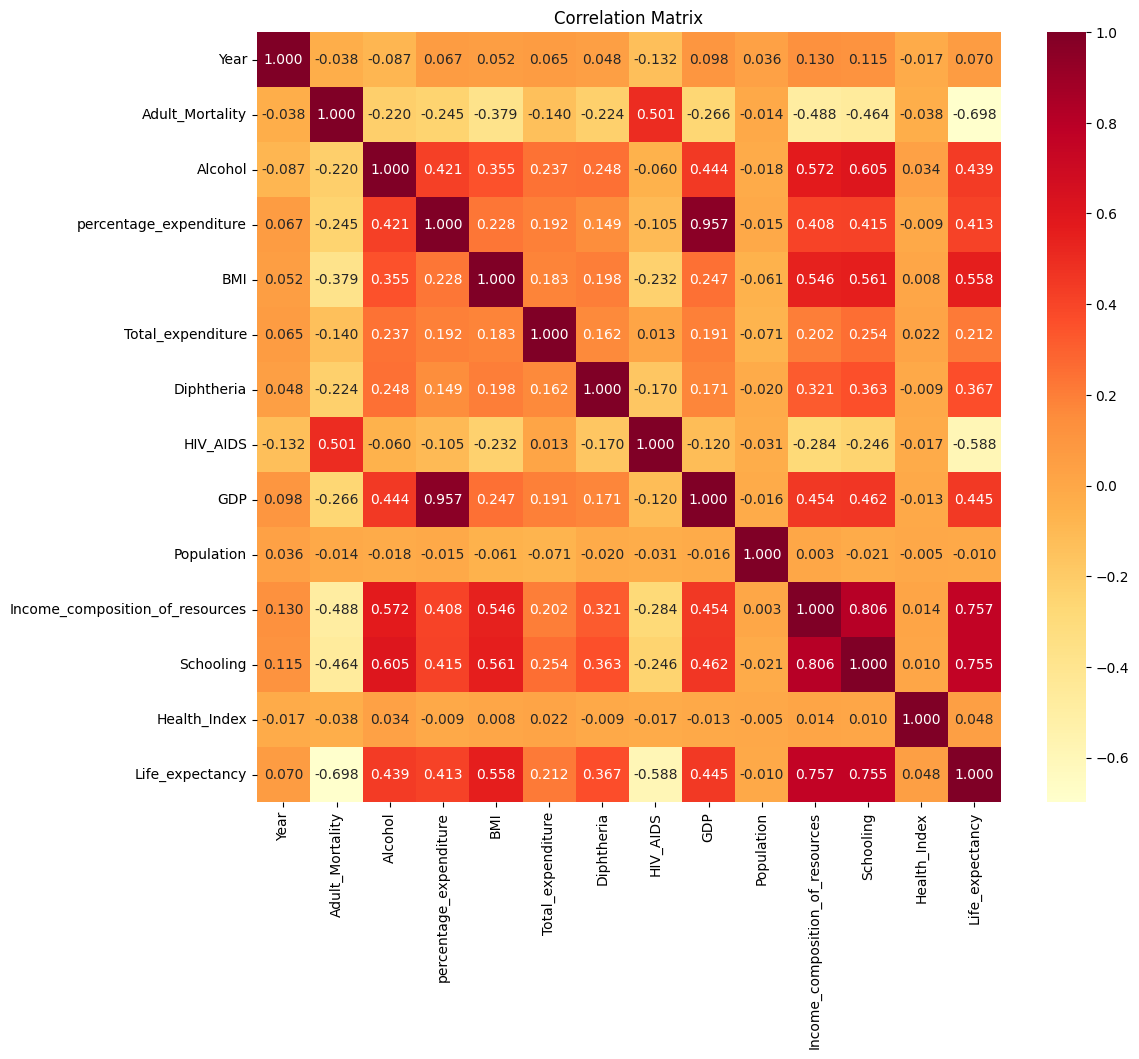

In [125]:
### WRITE CODE TO OBTAIN CORRELATION MATRIX ###
# Compute the correlation matrix
import seaborn as sns
corr_matrix = x.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='YlOrRd')
plt.title("Correlation Matrix")
plt.show()

##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans- The diagonal of a correlation matrix is made up of 1's because it represents the correlation of each variable with itself.

##### Q3. Why is the matrix symmetric along diagonal?<br/>
Ans- The correlation matrix is symmetric along the diagonal because the correlation between any two variables, X and Y is the same as the correlation between Y and X.

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>

Ans- Income_composition_of_resources could be a good predictor, since it has the highest positive correlation coefficient with Life_expectancy (0.756515), indicating a potential strong positive linear relationship, where higher values of income composition are associated with higher life expectancy.

Schooling can be a backup predictor, with a similar high correlation (0.755132) with Life_expectancy. However, Income_composition_of_resources also encapsulates aspects related to economic conditions, which is consensus to be strongly linked with health outcomes.

##### Q4.1. Is there any variable that does not make sense to you and why? <br/>
Ans- Health Index, which one would expect to exhibit a strong correlation with Life Expectancy, shows a notably insignificant correlation with Life Expectancy.



### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization.

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set.

In [126]:
# Load the test set "LifeExpectancy_test_modified.csv"
### WRITE CODE ###
df_test = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_test_modified.csv']))

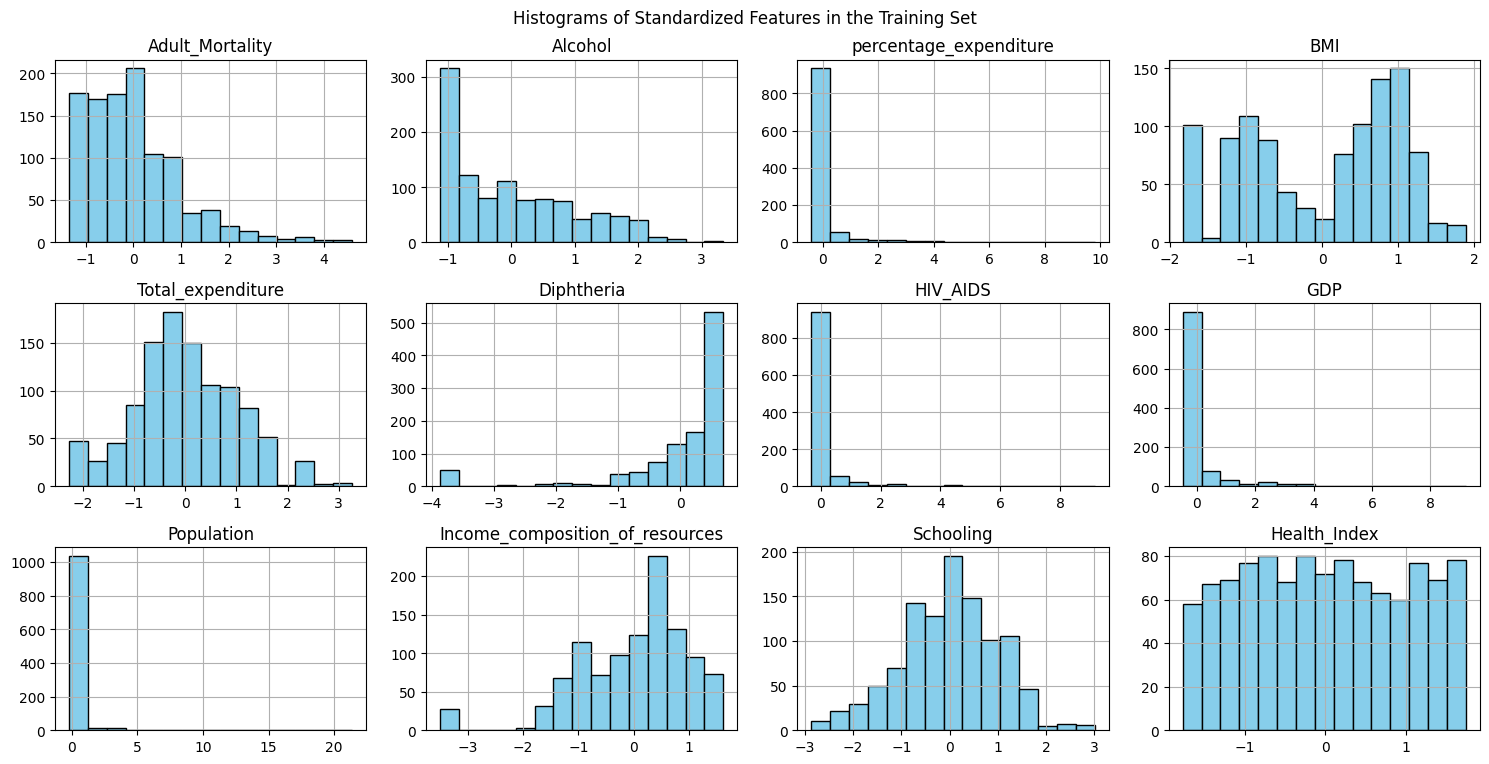

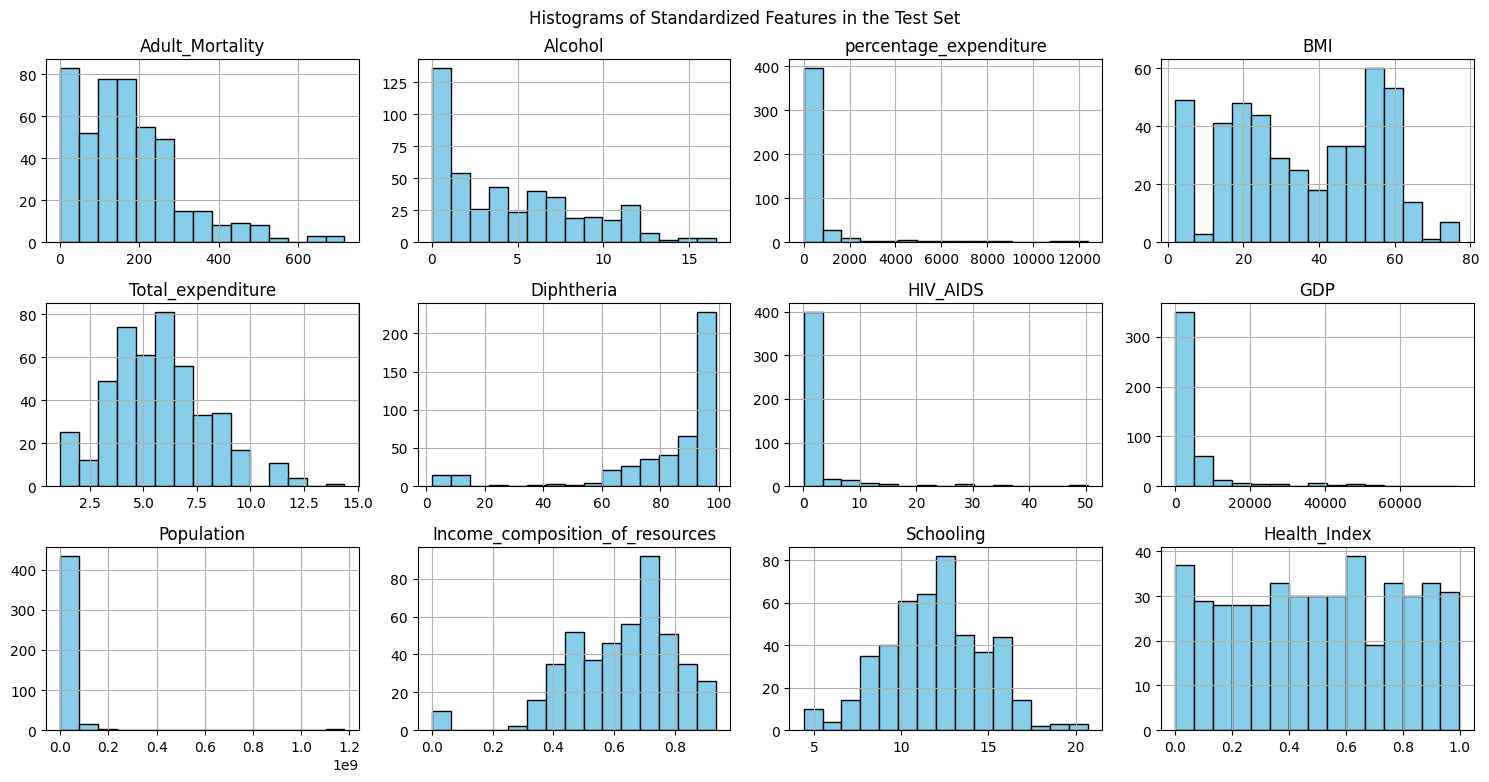

In [127]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###


# Select columns excluding 'Year' and 'Status' to standardize
features_to_standardize = [column for column in df.columns if column not in ['Year', 'Status','Life_expectancy']]

# Initialize standardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(df[features_to_standardize])

# Transform both training and testing data
df[features_to_standardize] = scaler.transform(df[features_to_standardize])
df_test[features_to_standardize] = scaler.transform(df_test[features_to_standardize])

# Select standardized features for visualization
standardized_features = df.columns.drop(['Year', 'Status', 'Life_expectancy'])

# Plot histograms for standardized features in the training set
df[standardized_features].hist(bins=15, figsize=(15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Standardized Features in the Training Set')
plt.tight_layout()
plt.show()

# Repeat for test set
df_test[standardized_features].hist(bins=15, figsize=(15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Standardized Features in the Test Set')
plt.tight_layout()
plt.show()

##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans-
Advantages
1. Makes different scales and units comparable.
2. Less sensitive to outliers than other methods.
3. Maintains Data Distribution: Preserves the original data distribution shape.

Disadvantages
1. Changes in mean or standard deviation significantly affect Z-scores.
2. Original meaning of data values can become less clear.

Ans-  In our context of predicting life expectancy, there are several important advantages using Z-score Normalization. First, standardization boosts disparate variables to same scale, such as GDP and BMI, which eliminates potential biases like GDP (with large numerical value) to not dominate the model. Secondly, features after standardization helps to optimize performance of models which are sensitive to the scale of data, such as logistic regression and neural networks. Lastly, the normalization helps detect outliers easily, which we can use to spot countries with unusual indicators like unusual high alcohol consumption rate to perform study separately.

There are also disadvantages. First, the data would lose its original interpretability. For example, one-unit change in the Z-score of alcohol consumption affects life expectancy is less intuitive than understanding the impact of a one-liter increase in alcohol consumption per capita. Moreover, Z-scores assumes distributions are approximate the normal curve, scaling might not work well if the feature does not follow normal distribution, which is the case for many of our feature distributions.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans-
Yes, we need to use the z-score normalization due to the significant scale differences among the data. By standardizing these values, we enable a more meaningful comparison and analysis across various features. This approach ensures that no single feature disproportionately influences the results due to its scale.

Ans- Comparing advantages and disadvantages in relation to our dataset, Z-score normalization can be applied to some of features like Schooling and Total_Expenditure that has normal distribution. It helps to neutralize the dominating scales of specific features like GDP and population, and promote a more balanced and fair influence on the model's predictions. But we need to be careful addressing outliers, and ensure reversing to present findings with transformation for better interpretation.

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [128]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###

encoder = OneHotEncoder(sparse=False)

encoded_cat_columns = encoder.fit_transform(df[['Year','Status']])
encoded_feature_names = encoder.get_feature_names_out(['Year','Status'])
encoded_df = pd.DataFrame(encoded_cat_columns, columns=encoded_feature_names)

encoded_cat_test_columns = encoder.fit_transform(df_test[['Year','Status']])
encoded_test_feature_names = encoder.get_feature_names_out(['Year','Status'])
encoded_df_test = pd.DataFrame(encoded_cat_test_columns, columns=encoded_test_feature_names)

print("Shape of encoded training array: ", encoded_df.shape)
print("Shape of encoded test array: ", encoded_df_test.shape)

Shape of encoded training array:  (1064, 16)
Shape of encoded test array:  (458, 15)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [129]:
# Create encoded training dataframe
categorical_columns = ['Year', 'Status'] # Isolate 'Year' and 'Status' column
categorical_data = df[categorical_columns]
encoder = OneHotEncoder(sparse=False) # Applying OneHotEncoder
categorical_encoded = encoder.fit_transform(categorical_data)

# get new column names for the encoded variables
encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# create encoded dataframe with encoded data column names
encoded_df = pd.DataFrame(categorical_encoded, columns=encoded_column_names, index=df.index)

# drop original 'Year' and 'Status' columns from df and concatenate other columns lolto encoded df
combined_df = pd.concat([df, encoded_df], axis=1)
combined_df.drop(columns=['Year','Status'], inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [130]:
# Encoding for test data set

categorical_test_data = df_test[categorical_columns]
categorical_test_encoded = encoder.transform(categorical_test_data)

encoded_test_df = pd.DataFrame(categorical_test_encoded, columns=encoded_column_names, index=df_test.index)

combined_test_df = pd.concat([df_test, encoded_test_df], axis=1)

combined_test_df.drop(columns=['Year','Status'], inplace = True)

In [131]:
combined_df

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,-0.595190,-0.726456,0.048715,1.255572,0.445559,-0.171244,-0.313881,0.227204,-0.139413,0.671470,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.109184,0.481078,0.023969,-0.320769,-0.831846,0.692054,-0.313881,-0.000131,0.925595,0.556023,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.801125,1.830823,-0.351900,0.886429,2.157283,0.500210,-0.313881,-0.438595,-0.074490,1.380648,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.249220,-1.115662,-0.399797,1.051047,-0.214434,0.452249,-0.313881,-0.482745,-0.182618,0.885873,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.220312,0.361323,-0.385773,-1.827272,-1.010683,0.548171,-0.201351,-0.459608,-0.107964,0.116223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,-0.059760,-1.115662,-0.398827,-1.108939,-2.036866,-0.123283,-0.313881,-0.474159,-0.196210,-0.087185,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1060,-0.817600,1.454092,2.928709,1.155804,1.028908,0.356327,-0.313881,2.455964,-0.215522,1.534578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1061,-1.262419,-0.768870,-0.085509,0.836545,0.045305,0.692054,-0.313881,-0.147601,-0.190580,0.385600,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1062,0.623944,-0.659094,-0.353924,-1.118916,-0.129273,-0.746776,-0.107577,-0.445607,1.326504,-1.175690,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [132]:
combined_test_df

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,275.0,0.01,7.097109,17.2,7.87,68.0,0.1,63.537231,2978599.0,0.454,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,287.0,0.03,25.873925,15.7,8.33,64.0,0.1,373.361116,2729431.0,0.433,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,88.0,5.37,437.062100,55.1,5.71,99.0,0.1,4437.178680,295195.0,0.738,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,15.0,5.16,26.993121,49.9,6.12,98.0,0.1,279.142931,311487.0,0.685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18.0,4.29,14.719289,47.9,6.27,97.0,0.1,189.681557,339616.0,0.674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,45.0,2.12,153.678375,19.7,4.87,87.0,11.9,1369.682490,1382517.0,0.504,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
454,526.0,2.25,1.860004,18.8,6.11,81.0,15.9,13.154199,12383446.0,0.479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
455,527.0,5.21,53.308581,29.4,5.37,89.0,15.7,713.635620,1486317.0,0.436,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
456,632.0,3.56,20.843429,28.6,4.96,75.0,20.5,325.678573,13558469.0,0.421,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Q7. What are the other types of encodings and why did we use One-hot encoding for "Year" and "Status"?

Ans- The other types of encodings is label encoding which assigns a unique integer to each level of the categorical variable. We use One-hot encodings based on several reasons. Firstly, "Year" and "Status" variables are nominal categories, where both being categorical without inherent and intrinsic orders.It also prevents assuming any numerical hierarchy or order in these variables which doesn't exist, which could bias the model, especially in this case where no such hierarchy exists. Lastly, in our dataset those two variables are not creating unmanagiable amount of additional feature columns, and each category is equally represented and interpreted by ML models, which contributes to unbiased analysis in predicting life expectancy.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
### Bulding and fitting the Multiple Linear Regression model###

X_train = combined_df.drop('Life_expectancy', axis=1)
y_train = combined_df['Life_expectancy']

# Run the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [135]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error

# Predict on the training set
y_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred)
print(f"The MSE on training is: {mse_train}")

The MSE on training is: 12.747314971108775


Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [137]:
coef = model.coef_
variables = X_train.columns
coef_df = pd.DataFrame({'Variable':variables,'Coefficient':coef})
print(coef_df)

                           Variable  Coefficient
0                   Adult_Mortality    -2.020835
1                           Alcohol    -0.487322
2            percentage_expenditure     0.617182
3                               BMI     0.709243
4                 Total_expenditure     0.257676
5                        Diphtheria     0.502615
6                          HIV_AIDS    -2.684256
7                               GDP     0.156547
8                        Population    -0.052496
9   Income_composition_of_resources     2.172872
10                        Schooling     2.619574
11                     Health_Index     0.248834
12                        Year_2002     0.556339
13                        Year_2003     0.894259
14                        Year_2004     0.561044
15                        Year_2005     0.578671
16                        Year_2006     0.281139
17                        Year_2007     0.225120
18                        Year_2008    -0.097972
19                  

Q9. Is there a problem of multicolinearity? Explain what you can do

Ans- When initially analyzing our data, we discovered that two of our explanatory variables, GDP and percentage_expenditure, had a correlation coefficient exceeding 0.8, indicating a strong relationship. To further validate this, we calculated the Variance Inflation Factor (VIF) for our variables and observed that only GDP and percentage_expenditure exhibited VIF values above 10. This reinforces the idea that these two variables are highly correlated, making one of them redundant in our multiple regression analysis. Given the substantial correlation, simply transforming these variables might not resolve the issue. A more effective approach would be to either remove both variables from our analysis or eliminate just one, which would retain the benefits of the other while addressing the multicollinearity issue presented by their combination.

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = standardized_features
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[standardized_features].values, i)
                          for i in range(len(standardized_features))]

print(vif_data)

                            feature        VIF
0                   Adult_Mortality   1.692335
1                           Alcohol   1.781363
2            percentage_expenditure  12.054380
3                               BMI   1.562536
4                 Total_expenditure   1.115692
5                        Diphtheria   1.175911
6                          HIV_AIDS   1.377391
7                               GDP  12.727783
8                        Population   1.012257
9   Income_composition_of_resources   3.289362
10                        Schooling   3.548249
11                     Health_Index   1.005006


### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation.

Fill in the code for calculation of R2 score

In [139]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [140]:
### WRITE CODE ###
# Calculate R-squared for both training and test data
x2 = combined_df[['Schooling']]
y2 = combined_df['Life_expectancy']
model_2 = LinearRegression()
model_2.fit(x2, y2)
y2_pred = model_2.predict(x2)
r2_model_2 = r2_score(y2, y2_pred)

# Print R2 score
print(f"R-squared: {r2_model_2}")

R-squared: 0.5702238510104203


$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [141]:
### WRITE CODE ###
x3 = combined_df[['Schooling', 'Adult_Mortality']]
y3 = combined_df['Life_expectancy']
model_3 = LinearRegression()
model_3.fit(x3, y3)
y3_pred = model_3.predict(x3)
r2_model_3 = r2_score(y3, y3_pred)

# Print R2 score
print(f"R-squared: {r2_model_3}")

R-squared: 0.7248288890984036


$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [142]:
### WRITE CODE ###
x4 = combined_df[['Schooling', 'Adult_Mortality', 'Population']]
y4 = combined_df['Life_expectancy']
model_4 = LinearRegression()
model_4.fit(x4, y4)
y4_pred = model_4.predict(x4)
r2_model_4 = r2_score(y4, y4_pred)

# Print R2 score
print(f"R-squared: {r2_model_4}")

R-squared: 0.7248514023230492


You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-p-1)}$<br/>
where:<br/>
n = number of samples<br/>
p = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [143]:
### WRITE CODE ###
adjusted_r2_model_2 = 1 - ((1 - r2_model_2) * (1064 - 1) / (1064 - 1 - 1))
# Print Adjusted R2 score
print(f"R-squared: {adjusted_r2_model_2}")

R-squared: 0.5698191653710705


Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [144]:
### WRITE CODE ###
adjusted_r2_model_3 = 1 - ((1 - r2_model_3) * (1064 - 1) / (1064 - 2 - 1))
# Print Adjusted R2 score
print(f"R-squared: {adjusted_r2_model_3}")

R-squared: 0.7243101876640934


Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [145]:
### WRITE CODE ###
adjusted_r2_model_4 = 1 - ((1 - r2_model_4) * (1064 - 1) / (1064 - 3 - 1))
# Print Adjusted R2 score
print(f"R-squared: {adjusted_r2_model_4}")

R-squared: 0.7240726798767938


### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [146]:
# Design a function to implement 5-fold cross-validation.
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.
from sklearn.metrics import mean_squared_error
import numpy as np

def cross_val_mse(X, y, f):
    n = len(X)
    indices = np.arange(n)
    np.random.shuffle(indices)

    mse_scores = []

    fold_size = n // f

    for i in range(f):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model.fit(X_train, y_train)

        # Assuming you have predictions from your model
        y_pred = model.predict(X_test)

        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    # Calculate the average MSE over the folds
    average_mse = np.mean(mse_scores)

    return average_mse


In [147]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE
from itertools import combinations
### Write code here ###
features_for_combinations = [column for column in df.columns if column not in ['Life_expectancy','Status','Year']]


In [150]:
min_mse = 100000
min_mse_set = 0

for i in range(1, len(features_for_combinations)):
  for feature_set in combinations(features_for_combinations,i+1):
    # print(feature_set)
    check_val = cross_val_mse(combined_df[list(feature_set)], combined_df['Life_expectancy'], 5)
    if check_val < min_mse:
      min_mse = check_val
      min_mse_set = feature_set
      # print(list(feature_set))
    check_val = cross_val_mse(combined_df[list(feature_set + ('Year_2002','Year_2003','Year_2004','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010','Year_2011','Year_2012','Year_2013','Year_2014','Year_2015'))], combined_df['Life_expectancy'], 5)
    if check_val < min_mse:
      min_mse = check_val
      min_mse_set = feature_set + ('Year_2002','Year_2003','Year_2004','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010','Year_2011','Year_2012','Year_2013','Year_2014','Year_2015')
    check_val = cross_val_mse(combined_df[list(feature_set + ('Year_2002','Year_2003','Year_2004','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010','Year_2011','Year_2012','Year_2013','Year_2014','Year_2015','Status_Developed','Status_Developing'))], combined_df['Life_expectancy'], 5)
    if check_val < min_mse:
      min_mse = check_val
      min_mse_set = feature_set + ('Year_2002','Year_2003','Year_2004','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010','Year_2011','Year_2012','Year_2013','Year_2014','Year_2015','Status_Developed','Status_Developing')
    check_val = cross_val_mse(combined_df[list(feature_set + ('Status_Developed','Status_Developing'))], combined_df['Life_expectancy'], 5)
    if check_val < min_mse:
      min_mse = check_val
      min_mse_set = feature_set + ('Status_Developed','Status_Developing')

In [ ]:
# Print the best features and the corresponding mse
### WRITE CODE ###
print(f"The feature set with the minimum MSE is {min_mse_set}")
print(f"The minimum Mean Squared Error (MSE) achieved is {min_mse}")

### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test_modified.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [98]:
### WRITE CODE ###

testing_model = LinearRegression()
testing_model.fit(combined_df[list(min_mse_set)], combined_df['Life_expectancy'])


LinearRegression()

In [99]:
# Output your prediction on test set as y_pred.
y_pred = testing_model.predict(combined_test_df[list(min_mse_set)])

In [ ]:
#end

### Individual student contribution
Student 1 name - contribution (ex- Q 1,2,3) </br>
Dhruv Jain - K-Fold Cross Validation and Testing Model + ensuring end to end execution of all parts

Guoyao (Jack) Ma - data exploration questions, one-hot encoding, feature standardization, multiple linear regression fitting and evaluation

Lezhi Deng - Question 1-6 and 9

Zhi Zhang - Data exploration, standardization of features, multiple linear regression, goodness of fit, K-fold CV

Jouchia (Sophie) Shu - Standardization of features, One-Hot Encoding, Multiple Linear Regression, Goodness of fit, K-fold function built, and making sure we all getting same coefficients/df outputs
